# Forecast working age population growth of regions in Finland

Data source: Statistic Finland

Table: 12f8 -- 10. All data groups by municipality, 2010-2021

Link: https://pxdata.stat.fi/PxWeb/pxweb/en/Postinumeroalueittainen_avoin_tieto/Postinumeroalueittainen_avoin_tieto__uusin/paavo_pxt_12f8.px/

In [1]:
import pandas as pd
import numpy as np

## Process raw data

In [2]:
# Create the base with region column DataFrame
base_df = pd.read_csv('../data/Indices/population_density_index.csv')
base_df = base_df[['Region code', 'Region name (en)', 'Region name (fi)']].copy()
base_df.drop_duplicates(subset=['Region code'], inplace=True)
base_df.reset_index(drop=True, inplace=True)

base_df

,Region code,Region name (en),Region name (fi)
0,MK01,Uusimaa,Uusimaa
1,MK02,Southwest Finland,Varsinais-Suomi
2,MK04,Satakunta,Satakunta
3,MK05,Kanta-Häme,Kanta-Häme
4,MK06,Pirkanmaa,Pirkanmaa
5,MK07,Päijät-Häme,Päijät-Häme
6,MK08,Kymenlaakso,Kymenlaakso
7,MK09,South Karelia,Etelä-Karjala
8,MK10,South Savo,Etelä-Savo
9,MK11,North Savo,Pohjois-Savo


In [3]:
# Load demographic data
demographic_df = pd.read_csv('../data/region_city_data/region_info_2011_2021.csv')
demographic_df

,Region,Information,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,MK01 Uusimaa,"Inhabitants, total (HE)",1532309.0,1549058.0,1566835.0,1585473.0,1603388.0,1620261.0,1638293.0,1655624.0,1671024.0,1689725.0,1702678.0,1714741.0
1,MK01 Uusimaa,Males (HE),741391.0,750126.0,759593.0,769181.0,778493.0,787495.0,797682.0,806972.0,815181.0,825227.0,832256.0,839306.0
2,MK01 Uusimaa,Females (HE),790918.0,798932.0,807242.0,816292.0,824895.0,832766.0,840611.0,848652.0,855843.0,864498.0,870422.0,875435.0
3,MK01 Uusimaa,Average age of inhabitants (HE),39.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,41.0,41.0,41.0,41.0
4,MK01 Uusimaa,0-2 years (HE),55759.0,55952.0,55756.0,55300.0,55183.0,54830.0,53901.0,52411.0,50959.0,49553.0,48816.0,49980.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1971,MK21 Åland,Unemployed (PT),446.0,422.0,546.0,583.0,652.0,623.0,552.0,573.0,548.0,574.0,1404.0,797.0
1972,MK21 Åland,Children aged 0 to 14 (PT),4582.0,4645.0,4665.0,4658.0,4696.0,4691.0,4779.0,4842.0,4953.0,4942.0,4974.0,4985.0
1973,MK21 Åland,Students (PT),1666.0,1567.0,1543.0,1567.0,1473.0,1457.0,1436.0,1339.0,1322.0,1559.0,1694.0,1642.0
1974,MK21 Åland,Pensioners (PT),5988.0,6142.0,6224.0,6357.0,6463.0,6586.0,6686.0,6873.0,6930.0,7063.0,7104.0,7338.0


In [4]:
# Choose rows that show the population of working age (16 to 64 years old)

# Create a regular expression pattern to match the specified format
# xx-yy years (HE)
pattern = r'^(\d{2})-(\d{2}) years \(HE\)$'

# Use the 'str.match' method to select rows that match the pattern
working_population = demographic_df[demographic_df['Information'].str.match(pattern)]

# Filter the rows based on the conditions
working_population = working_population[working_population.apply(lambda row: ( 
    (int(row['Information'][:2]) in range(16, 61) or int(row['Information'][:2]) in [16, 18]) and
    (int(row['Information'][3:5]) in range(20, 65) or int(row['Information'][3:5]) in [17, 19]) and
    (int(row['Information'][:2]) + 4 == int(row['Information'][3:5]) or 
     (int(row['Information'][:2]) in [16, 18] and int(row['Information'][3:5]) in [17, 19]))
    ), axis=1)]

working_population


,Region,Information,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
8,MK01 Uusimaa,16-17 years (HE),37284.0,36777.0,35623.0,34837.0,34086.0,33970.0,34650.0,34641.0,34646.0,35325.0,36553.0,36964.0
9,MK01 Uusimaa,18-19 years (HE),38006.0,38377.0,38153.0,37694.0,36515.0,35643.0,35041.0,35066.0,35606.0,35491.0,35307.0,36170.0
10,MK01 Uusimaa,20-24 years (HE),98150.0,100485.0,103332.0,104314.0,105051.0,104363.0,103280.0,101404.0,99076.0,97640.0,95659.0,94309.0
11,MK01 Uusimaa,25-29 years (HE),113459.0,113827.0,113300.0,114269.0,115893.0,118351.0,121965.0,125526.0,126901.0,128407.0,127804.0,125776.0
12,MK01 Uusimaa,30-34 years (HE),116553.0,117545.0,119561.0,121897.0,123341.0,124580.0,125189.0,125209.0,126772.0,129666.0,132694.0,135675.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1886,MK21 Åland,40-44 years (HE),2019.0,2001.0,1910.0,1866.0,1890.0,1903.0,1886.0,1863.0,1856.0,1841.0,1891.0,1899.0
1887,MK21 Åland,45-49 years (HE),1985.0,2049.0,2123.0,2180.0,2147.0,2074.0,2078.0,1977.0,1956.0,1949.0,1962.0,1972.0
1888,MK21 Åland,50-54 years (HE),1941.0,1956.0,1949.0,1943.0,1964.0,2026.0,2087.0,2160.0,2212.0,2168.0,2097.0,2084.0
1889,MK21 Åland,55-59 years (HE),2065.0,2069.0,2022.0,1958.0,1931.0,1947.0,1931.0,1957.0,1970.0,1990.0,2061.0,2120.0


In [5]:
working_population['Region code'] = working_population['Region'].apply(lambda x: x[:4])
working_population = working_population[['Region code', '2017', '2018', '2019', '2020', '2021']].copy()

working_population = working_population.groupby('Region code').sum().reset_index()
working_population = working_population.set_index('Region code').stack()
working_population = pd.DataFrame(working_population)
working_population.reset_index(inplace=True)
working_population.columns = ['Region code', 'Year', 'Working Age Population']
working_population

,Region code,Year,Working Age Population
0,MK01,2017,1078359.0
1,MK01,2018,1085345.0
2,MK01,2019,1096025.0
3,MK01,2020,1102795.0
4,MK01,2021,1108121.0
...,...,...,...
90,MK21,2017,17942.0
91,MK21,2018,17892.0
92,MK21,2019,17811.0
93,MK21,2020,17898.0


In [6]:
working_population['Working Age Population absolute growth (persons)'] = working_population.groupby('Region code')['Working Age Population'].diff()
working_population['Working Age Population relative growth (%)'] = working_population['Working Age Population absolute growth (persons)'] / working_population['Working Age Population'] * 100
working_population

,Region code,Year,Working Age Population,Working Age Population absolute growth (persons),Working Age Population relative growth (%)
0,MK01,2017,1078359.0,NaN,NaN
1,MK01,2018,1085345.0,6986.0,0.643666
2,MK01,2019,1096025.0,10680.0,0.974430
3,MK01,2020,1102795.0,6770.0,0.613895
4,MK01,2021,1108121.0,5326.0,0.480633
...,...,...,...,...,...
90,MK21,2017,17942.0,NaN,NaN
91,MK21,2018,17892.0,-50.0,-0.279455
92,MK21,2019,17811.0,-81.0,-0.454775
93,MK21,2020,17898.0,87.0,0.486088


In [7]:
df = pd.merge(base_df, working_population, on='Region code', how='left')
df

,Region code,Region name (en),Region name (fi),Year,Working Age Population,Working Age Population absolute growth (persons),Working Age Population relative growth (%)
0,MK01,Uusimaa,Uusimaa,2017,1078359.0,NaN,NaN
1,MK01,Uusimaa,Uusimaa,2018,1085345.0,6986.0,0.643666
2,MK01,Uusimaa,Uusimaa,2019,1096025.0,10680.0,0.974430
3,MK01,Uusimaa,Uusimaa,2020,1102795.0,6770.0,0.613895
4,MK01,Uusimaa,Uusimaa,2021,1108121.0,5326.0,0.480633
...,...,...,...,...,...,...,...
90,MK21,Åland,Ahvenanmaa,2017,17942.0,NaN,NaN
91,MK21,Åland,Ahvenanmaa,2018,17892.0,-50.0,-0.279455
92,MK21,Åland,Ahvenanmaa,2019,17811.0,-81.0,-0.454775
93,MK21,Åland,Ahvenanmaa,2020,17898.0,87.0,0.486088


In [8]:
DATA = df.copy()
DATA

,Region code,Region name (en),Region name (fi),Year,Working Age Population,Working Age Population absolute growth (persons),Working Age Population relative growth (%)
0,MK01,Uusimaa,Uusimaa,2017,1078359.0,NaN,NaN
1,MK01,Uusimaa,Uusimaa,2018,1085345.0,6986.0,0.643666
2,MK01,Uusimaa,Uusimaa,2019,1096025.0,10680.0,0.974430
3,MK01,Uusimaa,Uusimaa,2020,1102795.0,6770.0,0.613895
4,MK01,Uusimaa,Uusimaa,2021,1108121.0,5326.0,0.480633
...,...,...,...,...,...,...,...
90,MK21,Åland,Ahvenanmaa,2017,17942.0,NaN,NaN
91,MK21,Åland,Ahvenanmaa,2018,17892.0,-50.0,-0.279455
92,MK21,Åland,Ahvenanmaa,2019,17811.0,-81.0,-0.454775
93,MK21,Åland,Ahvenanmaa,2020,17898.0,87.0,0.486088


## Visualizing for all regions

In [9]:
DATA

,Region code,Region name (en),Region name (fi),Year,Working Age Population,Working Age Population absolute growth (persons),Working Age Population relative growth (%)
0,MK01,Uusimaa,Uusimaa,2017,1078359.0,NaN,NaN
1,MK01,Uusimaa,Uusimaa,2018,1085345.0,6986.0,0.643666
2,MK01,Uusimaa,Uusimaa,2019,1096025.0,10680.0,0.974430
3,MK01,Uusimaa,Uusimaa,2020,1102795.0,6770.0,0.613895
4,MK01,Uusimaa,Uusimaa,2021,1108121.0,5326.0,0.480633
...,...,...,...,...,...,...,...
90,MK21,Åland,Ahvenanmaa,2017,17942.0,NaN,NaN
91,MK21,Åland,Ahvenanmaa,2018,17892.0,-50.0,-0.279455
92,MK21,Åland,Ahvenanmaa,2019,17811.0,-81.0,-0.454775
93,MK21,Åland,Ahvenanmaa,2020,17898.0,87.0,0.486088


In [10]:
import matplotlib.pyplot as plt

In [11]:
# functions to get dataframes for each region 
def get_region_data(region_code, df):
    """Return dataframe with region code, year."""
    df_region = df[df['Region code'] == region_code].copy()
    df_region = df_region[['Year', 'Working Age Population']].copy()
    df_region.set_index('Year', inplace=True)
    return df_region

def visualize_all_regions():
    df = DATA.copy()
    fig, axes = plt.subplots(5, 4, figsize=(20, 20))
    axes = axes.flatten()
    for i, region in enumerate(df['Region code'].unique()):
        df_region = get_region_data(region, df)
        df_region.plot(ax=axes[i], legend=False)
        axes[i].set_title(region)
        axes[i].set_xlabel('Year')
        axes[i].set_ylabel('Working Age Population')
    plt.tight_layout()
    plt.show()

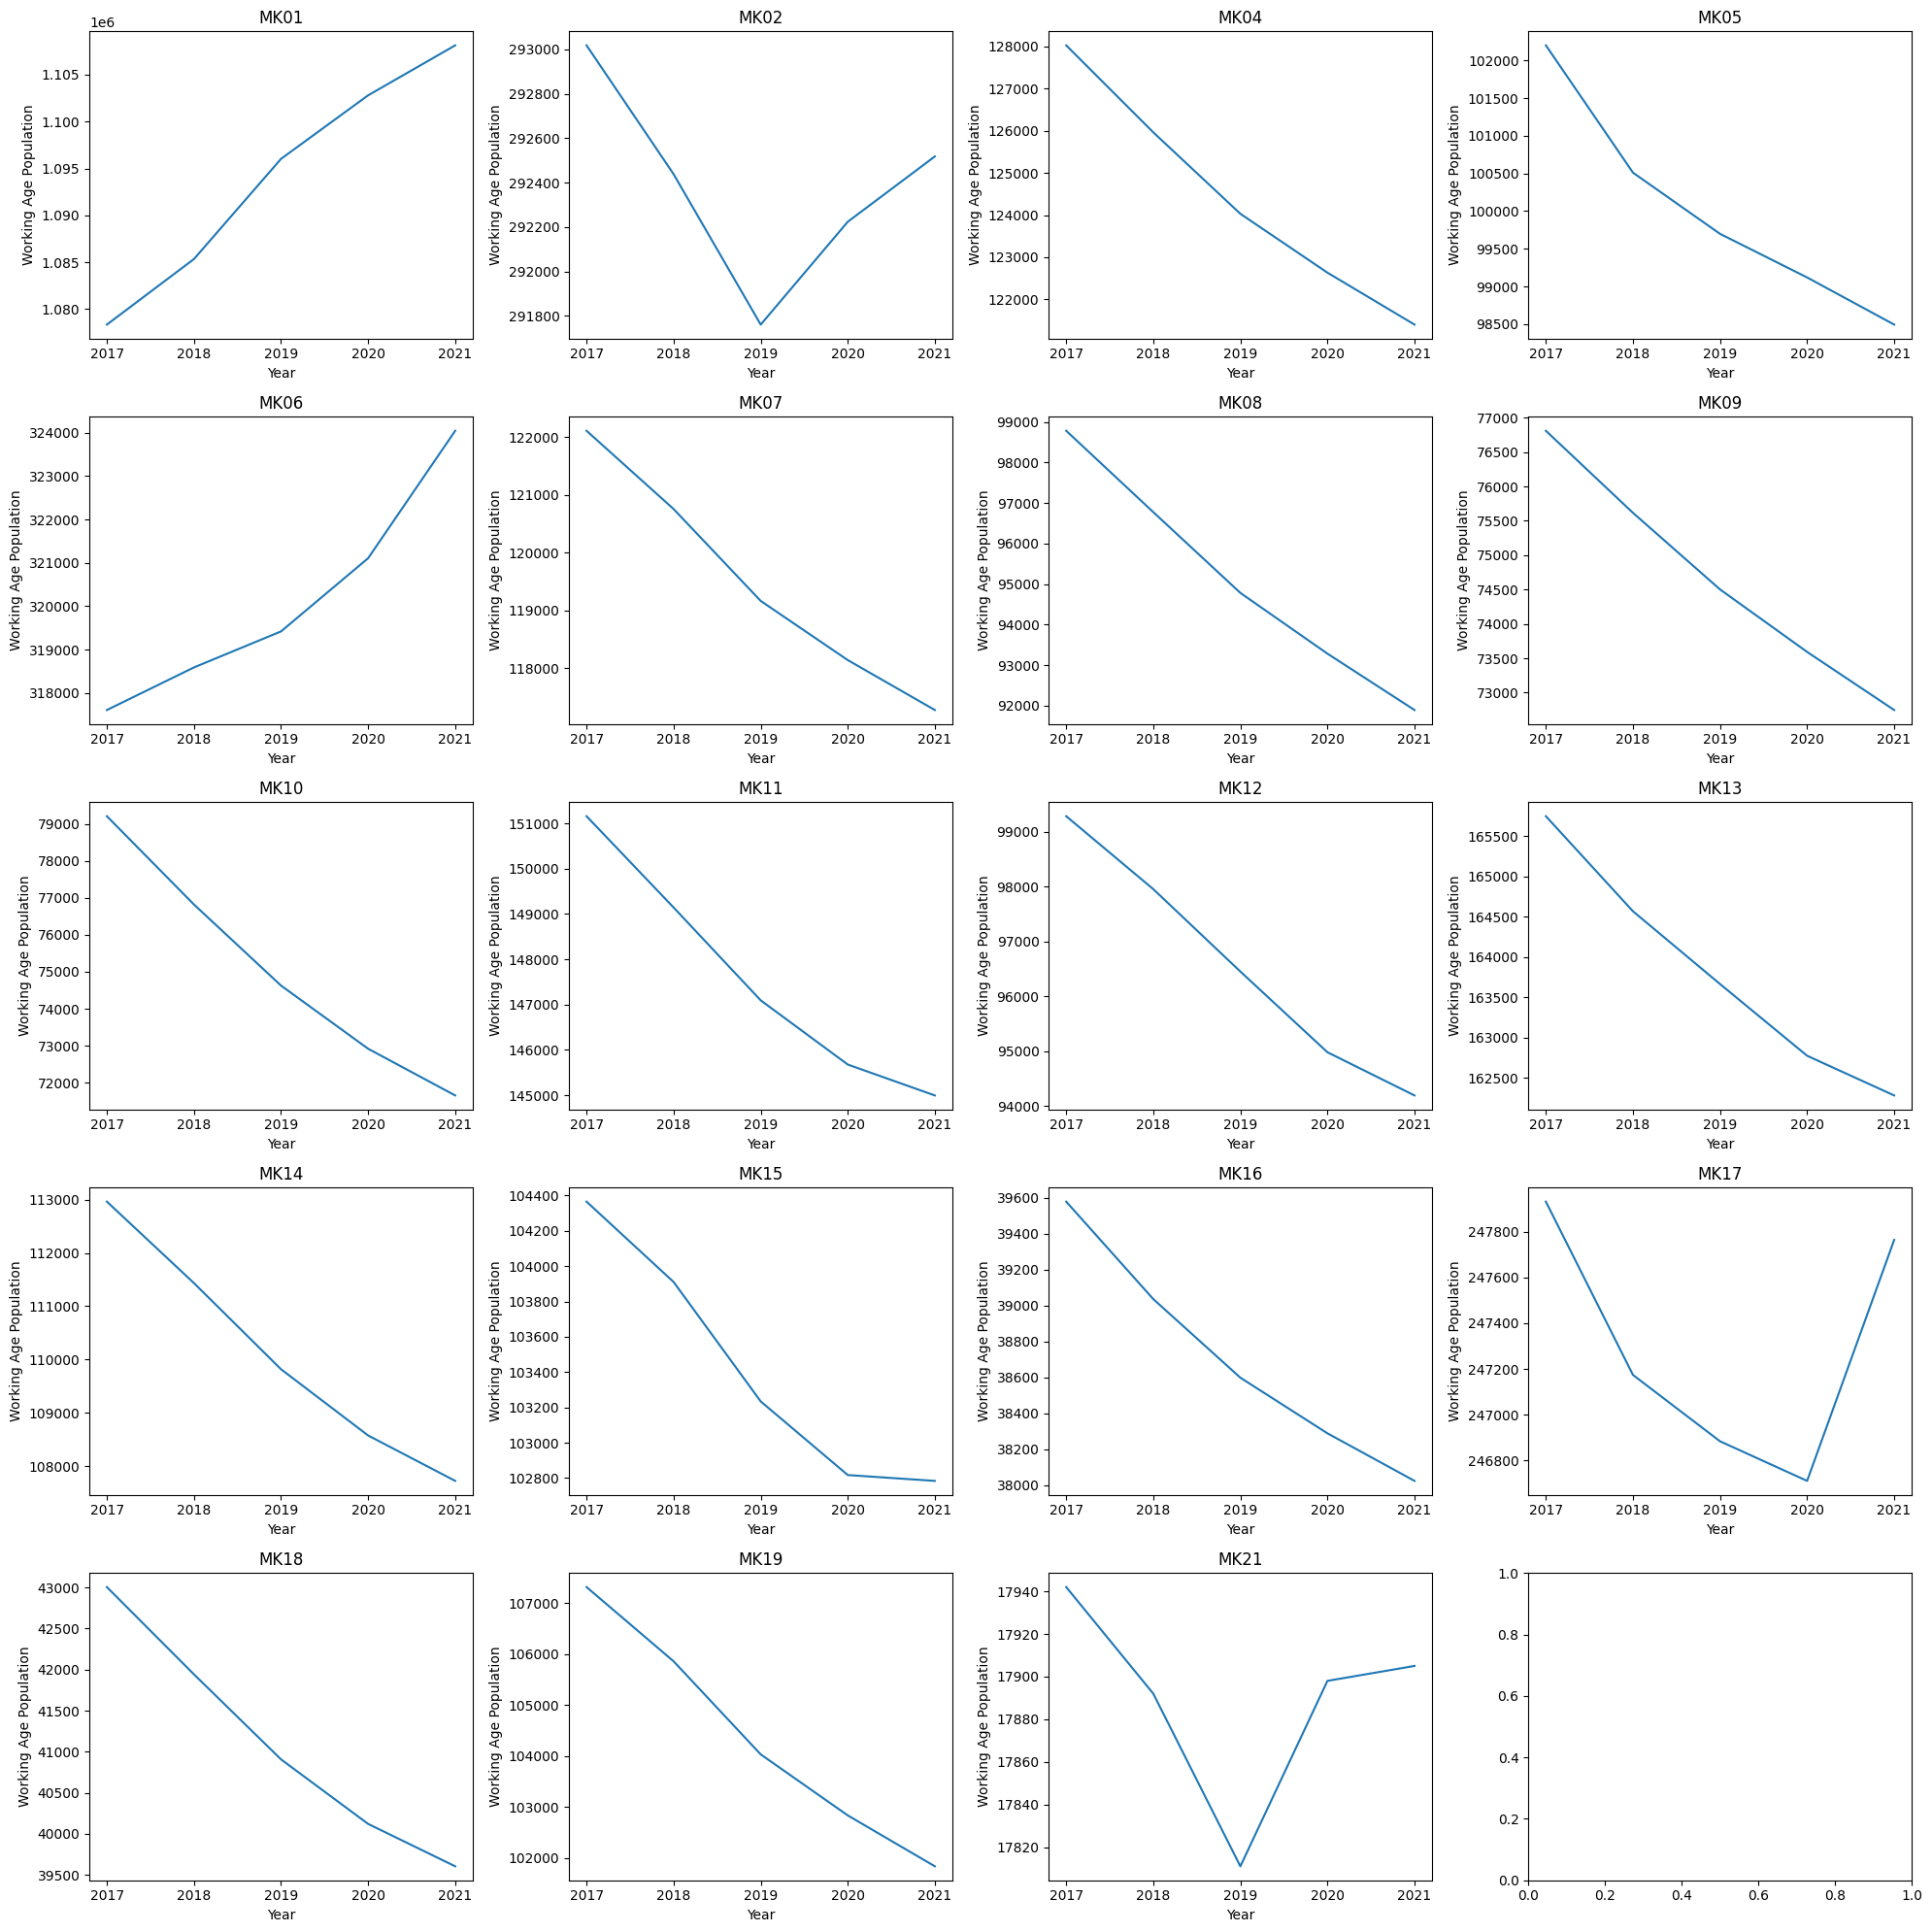

In [12]:
visualize_all_regions()

## LinearRegression model

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def get_future_forecast_df(forecast_df, future_years, region):
    future_forecast_df = forecast_df[forecast_df['Year'].isin(future_years)].copy()
    future_forecast_df = future_forecast_df[['Year', 'Forecast']].copy()
    future_forecast_df.columns = ['Year', region]
    return future_forecast_df
    

def report_region_data(region, df, ax, dfs):
    '''Create forecast and visualize Working Age Population of the given region with Linear Regression'''

    # Get the region's data
    df_region = get_region_data(region_code=region, df=df)
    df_region.reset_index(inplace=True)
    df_region['Year'] = df_region['Year'].astype(int)

    train_data = df_region.copy()

    # Create a LinearRegression model
    model = LinearRegression()

    # Fit the model to the data
    model.fit(train_data['Year'].values.reshape(-1, 1), train_data['Working Age Population'])

    # Forecast for the training and test data
    train_forecast = model.predict(train_data['Year'].values.reshape(-1, 1))

    # Calculate the training and testing error (Mean Absolute Error, MAE)
    train_data['Forecast'] = train_forecast
    train_mae = mean_absolute_error(train_data['Working Age Population'], train_forecast)

    # Forecast for the next 3 years outside the scope of data
    num_years_to_forecast = 3
    last_year = df_region['Year'].max()
    forecast_years = np.arange(last_year + 1, last_year + num_years_to_forecast + 1)
    forecast_df = pd.DataFrame({'Year': forecast_years})
    forecast = model.predict(forecast_df['Year'].values.reshape(-1, 1))
    # forecast.index = range(len(forecast))
    forecast_df['Forecast'] = forecast

    # Save the future forecast of this region into the list of future forecasts for all regions
    future_forecast_df = get_future_forecast_df(forecast_df, forecast_years, region)
    dfs.append(future_forecast_df)

    # Plot the region's data on the subplot
    ax.plot(train_data['Year'], train_data['Working Age Population'], label='Train Data', marker='o', markersize=6, color='blue')

    # Plot the training and test forecasts
    ax.plot(train_data['Year'], train_data['Forecast'], label='Train Forecast', linestyle='dashed', color='red')
    ax.plot(forecast_df['Year'], forecast_df['Forecast'], label='Test & Future Forecast', linestyle='dashed', color='black')

    # Set x-ticks for every year
    ax.set_xticks(range(train_data['Year'].min(), forecast_years[-1] + 1))
    ax.set_xticklabels(ax.get_xticks(), rotation=45)
    ax.set_title(f'Forecast Working Age Population in {region} - Train error: {train_mae:.2f}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Working Age Population')

    # Annotate the test and forecast points
    forecast_years_to_annotate = forecast_df['Year'].iloc[-num_years_to_forecast:]
    forecast_values_to_annotate = forecast[-num_years_to_forecast:]
    for year, value in zip(forecast_years_to_annotate, forecast_values_to_annotate):
        ax.scatter(year, value, marker='o', color='black')
        ax.annotate(f'{value:.2f}', (year, value), textcoords="offset points", xytext=(0, 10), ha='center', color='black')

    ax.legend(loc='upper left')
    ax.grid(True)


def forecast_and_visualize_all_regions(func):
    '''Create a 5x4 plot of forecasts for each region using the given function'''
    dfs = []
    fig, axes = plt.subplots(5, 4, figsize=(30, 30))
    axes = axes.flatten()
    for i, region in enumerate(DATA['Region code'].unique()):
        func(region, DATA, axes[i], dfs)
    plt.tight_layout()
    plt.show()

    return dfs


def future_forecast_all_regions(dfs):
    '''Create a DataFrame with the future forecasts of all regions'''
    df = pd.DataFrame({'Year': dfs[0]['Year']})
    for region in dfs:
        df = pd.merge(df, region, on='Year', how='inner')
    return df

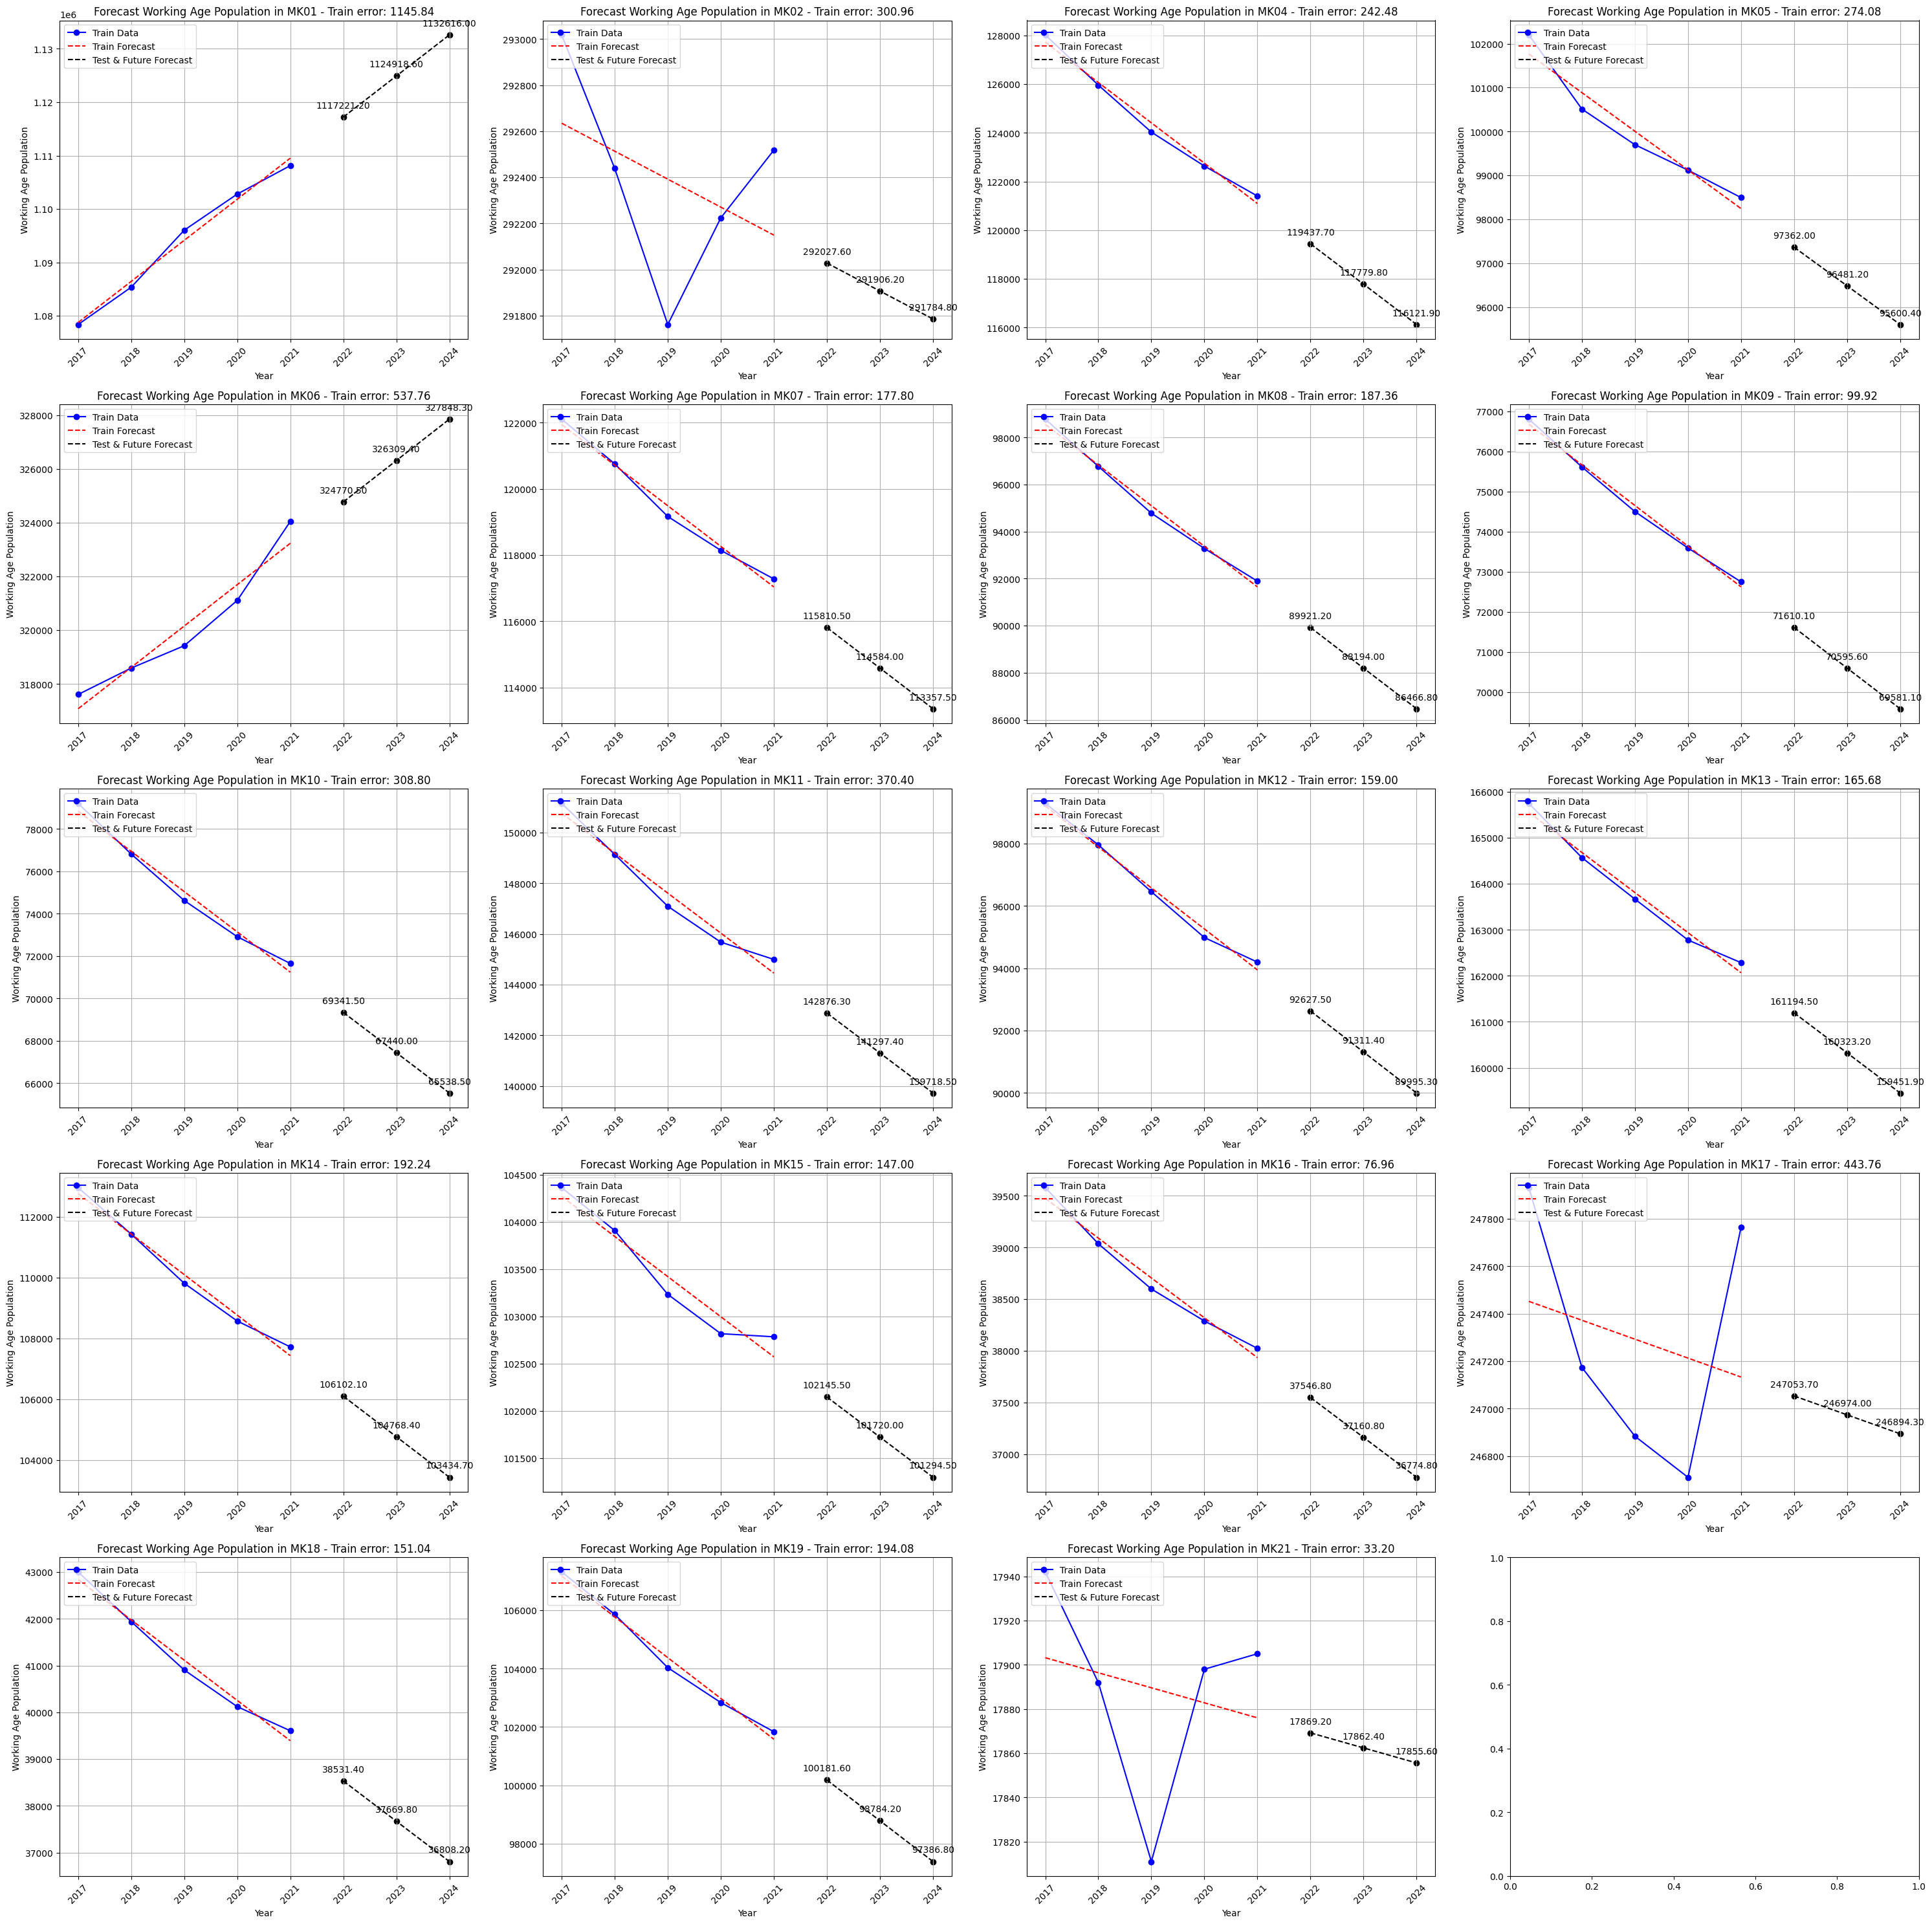

,Year,MK01,MK02,MK04,MK05,MK06,MK07,MK08,MK09,MK10,MK11,MK12,MK13,MK14,MK15,MK16,MK17,MK18,MK19,MK21
0,2022,1117221.2,292027.6,119437.7,97362.0,324770.5,115810.5,89921.2,71610.1,69341.5,142876.3,92627.5,161194.5,106102.1,102145.5,37546.8,247053.7,38531.4,100181.6,17869.2
1,2023,1124918.6,291906.2,117779.8,96481.2,326309.4,114584.0,88194.0,70595.6,67440.0,141297.4,91311.4,160323.2,104768.4,101720.0,37160.8,246974.0,37669.8,98784.2,17862.4
2,2024,1132616.0,291784.8,116121.9,95600.4,327848.3,113357.5,86466.8,69581.1,65538.5,139718.5,89995.3,159451.9,103434.7,101294.5,36774.8,246894.3,36808.2,97386.8,17855.6


In [15]:
# Forecast + visualize all regions population density
working_age_all = forecast_and_visualize_all_regions(report_region_data)

working_age_all = future_forecast_all_regions(working_age_all)
working_age_all

In [16]:
historical = DATA.copy()
forecast = working_age_all.copy()

In [17]:
historical = historical[['Year', 'Region code', 'Working Age Population']]
historical = historical.pivot_table(index='Year', columns='Region code', values='Working Age Population')
historical.columns.name = None
historical.reset_index(inplace=True)

In [18]:
display(historical)
display(forecast)

,Year,MK01,MK02,MK04,MK05,MK06,MK07,MK08,MK09,MK10,MK11,MK12,MK13,MK14,MK15,MK16,MK17,MK18,MK19,MK21
0,2017,1078359.0,293018.0,128027.0,102201.0,317608.0,122107.0,98782.0,76809.0,79210.0,151157.0,99288.0,165746.0,112963.0,104365.0,39579.0,247931.0,43004.0,107312.0,17942.0
1,2018,1085345.0,292438.0,125963.0,100511.0,318590.0,120754.0,96775.0,75616.0,76821.0,149142.0,97958.0,164568.0,111435.0,103910.0,39036.0,247174.0,41942.0,105856.0,17892.0
2,2019,1096025.0,291761.0,124031.0,99698.0,319420.0,119166.0,94782.0,74502.0,74627.0,147094.0,96455.0,163666.0,109818.0,103234.0,38598.0,246884.0,40907.0,104031.0,17811.0
3,2020,1102795.0,292224.0,122634.0,99119.0,321107.0,118143.0,93283.0,73593.0,72918.0,145677.0,94983.0,162777.0,108576.0,102817.0,38288.0,246711.0,40122.0,102834.0,17898.0
4,2021,1108121.0,292518.0,121402.0,98493.0,324044.0,117280.0,91892.0,72748.0,71654.0,144995.0,94195.0,162285.0,107724.0,102784.0,38023.0,247764.0,39606.0,101836.0,17905.0


,Year,MK01,MK02,MK04,MK05,MK06,MK07,MK08,MK09,MK10,MK11,MK12,MK13,MK14,MK15,MK16,MK17,MK18,MK19,MK21
0,2022,1117221.2,292027.6,119437.7,97362.0,324770.5,115810.5,89921.2,71610.1,69341.5,142876.3,92627.5,161194.5,106102.1,102145.5,37546.8,247053.7,38531.4,100181.6,17869.2
1,2023,1124918.6,291906.2,117779.8,96481.2,326309.4,114584.0,88194.0,70595.6,67440.0,141297.4,91311.4,160323.2,104768.4,101720.0,37160.8,246974.0,37669.8,98784.2,17862.4
2,2024,1132616.0,291784.8,116121.9,95600.4,327848.3,113357.5,86466.8,69581.1,65538.5,139718.5,89995.3,159451.9,103434.7,101294.5,36774.8,246894.3,36808.2,97386.8,17855.6


In [19]:
final_df = pd.concat([historical, forecast], ignore_index=True)
final_df

,Year,MK01,MK02,MK04,MK05,MK06,MK07,MK08,MK09,MK10,MK11,MK12,MK13,MK14,MK15,MK16,MK17,MK18,MK19,MK21
0,2017,1078359.0,293018.0,128027.0,102201.0,317608.0,122107.0,98782.0,76809.0,79210.0,151157.0,99288.0,165746.0,112963.0,104365.0,39579.0,247931.0,43004.0,107312.0,17942.0
1,2018,1085345.0,292438.0,125963.0,100511.0,318590.0,120754.0,96775.0,75616.0,76821.0,149142.0,97958.0,164568.0,111435.0,103910.0,39036.0,247174.0,41942.0,105856.0,17892.0
2,2019,1096025.0,291761.0,124031.0,99698.0,319420.0,119166.0,94782.0,74502.0,74627.0,147094.0,96455.0,163666.0,109818.0,103234.0,38598.0,246884.0,40907.0,104031.0,17811.0
3,2020,1102795.0,292224.0,122634.0,99119.0,321107.0,118143.0,93283.0,73593.0,72918.0,145677.0,94983.0,162777.0,108576.0,102817.0,38288.0,246711.0,40122.0,102834.0,17898.0
4,2021,1108121.0,292518.0,121402.0,98493.0,324044.0,117280.0,91892.0,72748.0,71654.0,144995.0,94195.0,162285.0,107724.0,102784.0,38023.0,247764.0,39606.0,101836.0,17905.0
5,2022,1117221.2,292027.6,119437.7,97362.0,324770.5,115810.5,89921.2,71610.1,69341.5,142876.3,92627.5,161194.5,106102.1,102145.5,37546.8,247053.7,38531.4,100181.6,17869.2
6,2023,1124918.6,291906.2,117779.8,96481.2,326309.4,114584.0,88194.0,70595.6,67440.0,141297.4,91311.4,160323.2,104768.4,101720.0,37160.8,246974.0,37669.8,98784.2,17862.4
7,2024,1132616.0,291784.8,116121.9,95600.4,327848.3,113357.5,86466.8,69581.1,65538.5,139718.5,89995.3,159451.9,103434.7,101294.5,36774.8,246894.3,36808.2,97386.8,17855.6


In [20]:
final_df.to_csv('../data/forecast_values/working_age_population.csv', index=False)